In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
csv_file_path = "Desktop/stack-overflow-developer-survey-2023/survey_results_public.csv"

In [21]:
# ნაბიჯი 1: ჩატვირთეთ CSV მონაცემები
df = pd.read_csv(csv_file_path)

In [22]:
# ნაბიჯი 2: "Age" სვეტის წინასწარ დამუშავება
# გაყავით ასაკობრივი დიაპაზონი და ამოიღეთ ქვედა ზღვარი ,ვინაიდან გვჭირდება მხოლოდ ციფრები
df['Age'] = df['Age'].str.split('-').str[0]

In [23]:
# გადააკეთეთ სვეტი "Age" რიცხვითი მონაცემების ტიპად
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [24]:
# ნაბიჯი 3: აქაც "Employment" სვეტს ვაფორმირებ ,რომ წამოვიღო მხოლოდ "full-time" ტიპის მონაცემები მთლიანი სტრინგიდან
df['Employment'] = df['Employment'].str.split(',').str[1].str.strip()

In [25]:
# ნაბიჯი 4: გამომაქვს სასურველი მწკრივები 
emplys_info = df[['MainBranch', 'Age', 'Employment', 'EdLevel']]

In [26]:
# ნაბიჯი 5: ვანიჭებ ინდექსებს უნიკალური მნიშვნელობების მქონე სვეტს
df.set_index('ResponseId', inplace=True)

In [27]:
# ნაბიჯი 6: ვფილტრავ ცხრილს სასურველი კონდიციების მიხედვით
filter_condition = (df['Age'] > 30) & (df['Employment'] == 'full-time')

In [28]:
filtered_data = df[filter_condition]

In [29]:
print("Filtered Table:")
print(filtered_data)

Filtered Table:
               Q120                                         MainBranch   Age  \
ResponseId                                                                     
3           I agree                     I am a developer by profession  45.0   
6           I agree                     I am a developer by profession  35.0   
7           I agree                     I am a developer by profession  35.0   
9           I agree  I am not primarily a developer, but I write co...  45.0   
14          I agree  I am not primarily a developer, but I write co...  35.0   
...             ...                                                ...   ...   
89170       I agree                     I am a developer by profession  45.0   
89173       I agree                     I am a developer by profession  45.0   
89178       I agree                     I am a developer by profession  35.0   
89179       I agree                     I am a developer by profession  45.0   
89184       I agree     

In [30]:
sorted_data = df.sort_values(by=['Age', 'ConvertedCompYearly'], ascending=[True, False])
print(sorted_data)

               Q120                      MainBranch   Age  \
ResponseId                                                  
53269       I agree  I am a developer by profession  18.0   
80587       I agree  I am a developer by profession  18.0   
34997       I agree  I am a developer by profession  18.0   
82593       I agree  I am a developer by profession  18.0   
81524       I agree  I am a developer by profession  18.0   
...             ...                             ...   ...   
89097       I agree           I am learning to code   NaN   
89135       I agree     I code primarily as a hobby   NaN   
89160       I agree                   None of these   NaN   
89182       I agree     I code primarily as a hobby   NaN   
89183       I agree  I am a developer by profession   NaN   

                                  Employment  \
ResponseId                                     
53269                             freelancer   
80587       full-time;Independent contractor   
34997         

In [31]:
# ვიყენებს ფუნქციებს სტატისტიკური მონაცემების აღსაწერად
mean_age = df['Age'].mean()
std_dev_age = df['Age'].std()
median_age = df['Age'].median()
min_age = df['Age'].min()
max_age = df['Age'].max()

In [15]:
print("\nStatistical Summary:")
print("Mean Age:", mean_age)
print("Standard Deviation of Age:", std_dev_age)
print("Median Age:", median_age)
print("Minimum Age:", min_age)
print("Maximum Age:", max_age)


Statistical Summary:
Mean Age: 29.173773910542213
Standard Deviation of Age: 9.708850501250815
Median Age: 25.0
Minimum Age: 18.0
Maximum Age: 55.0


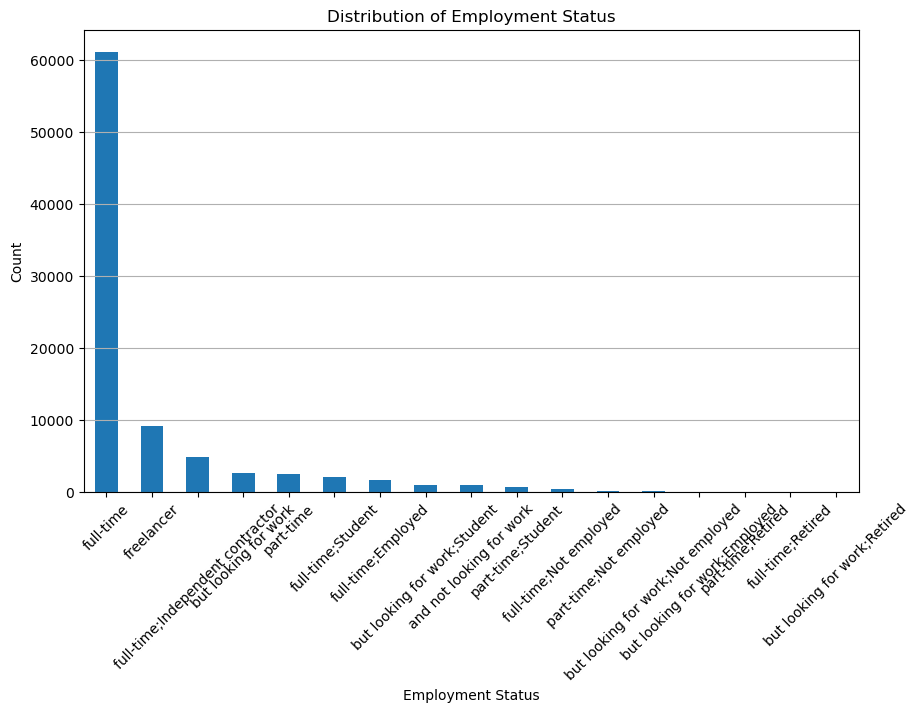

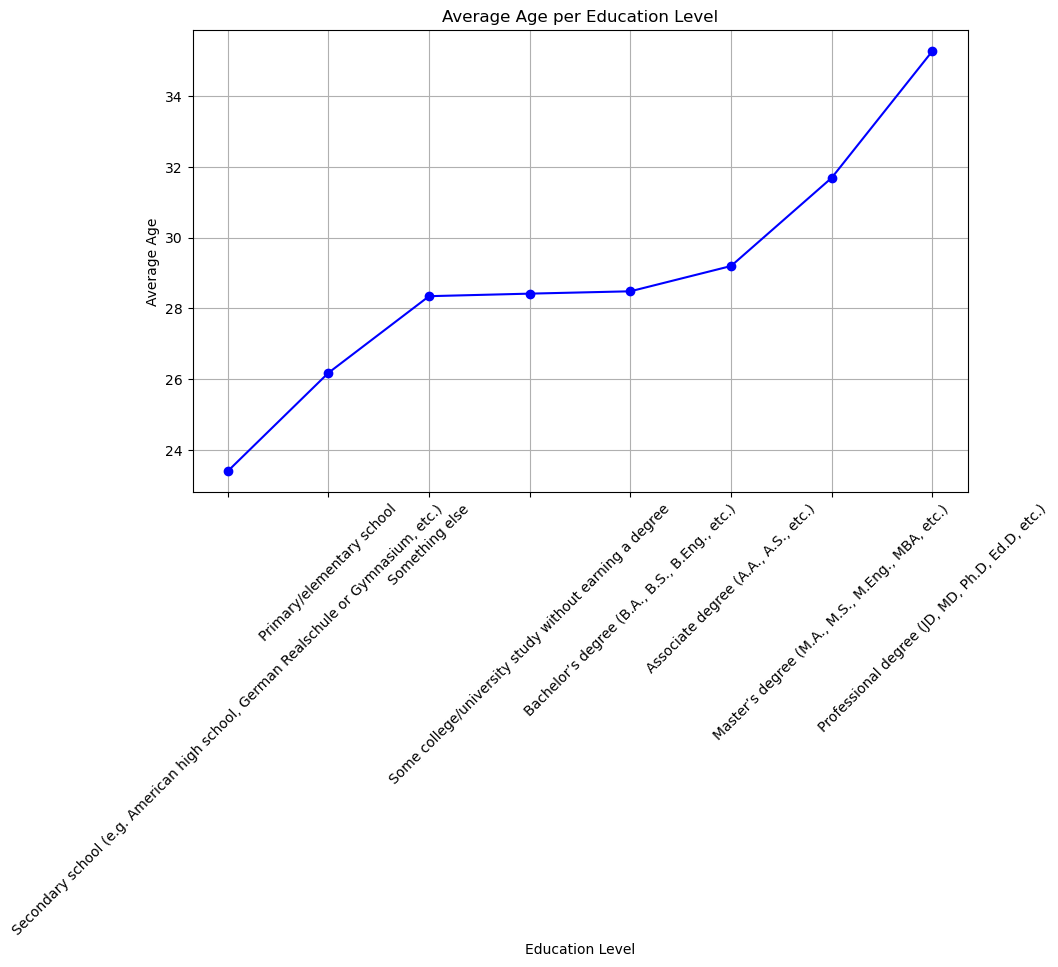

In [32]:
import matplotlib.pyplot as plt

# დასაქმების სტატუსის განაწილება(Bar Chart) 
plt.figure(figsize=(10, 6))
df['Employment'].value_counts().plot(kind='bar')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# საშუალო ასაკი განათლების დონეზე(Line Chart)

plt.figure(figsize=(10, 6))
avg_age_per_edu = df.groupby('EdLevel')['Age'].mean().sort_values()
avg_age_per_edu.plot(kind='line', marker='o', color='b')
plt.title('Average Age per Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
